# Linear Regression Report

The purpose of this project is to demonstrate how we can use parallel processing to combine with machine learning so make the computation run faster. 

<ul>
<li>Introduction</li>
<li>Procedure</li>
<li>Result</li>
<li>Conclusion</li>
</ul>

<h3>Introduction</h3>

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X.The relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. 

<img src="https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg" height="650" width="650"/>

When training the data, if data size of data is very large, training might take very long time. Imagine having to train PetaBye size of files. In this project, I will try to use parallel processing technique to help speeding up the time need to train a model. 

<h4>Data</h4>

The dataset come from https://www.kaggle.com/c/house-prices-advanced-regression-techniques. The data contain a lot of features. In this experiment, I already extract features that has high colleration with the output which is "SalePrice". The goal is to predict the price of a house given house properties by using Linear Regression. 

In [2]:
import pandas as pd
dataset = pd.read_csv('train.csv')
dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Procedure</h2>

There are some procedure in fitting a line to a dataset. The steps are as follow :
<ul>
<li>Preprocessing (Clean data)</li>
<li>Load Data into Memory to process</li>
<li>Finding Optimal Weight (Normal Equation)</li>
<li>Evaluation using validate set</li>
</ul>


<h3>Preprocessing</h3>
Here we need to clean the data. Cleaning data can range from dealing the noise to feature scaling. This will be done before loading the data into Java file. The remaining features are shown below.

In [9]:
cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
dataset[cols].head(5)

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
0,7,1710,2,856,2,2003
1,6,1262,2,1262,2,1976
2,7,1786,2,920,2,2001
3,7,1717,3,756,1,1915
4,8,2198,3,1145,2,2000


Below also show example of SalePrice of the first five house.

In [10]:
target = ['SalePrice']
dataset[target].head(5)

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


<h3>Loading the Data</h3>
We will load data into Java to calculate optimal weights best fitting the data. Here, I had seperate the file into 4 parts.
In sequential, we will need to read file by file. In contrast, parallel version will be able to read all of them consequently. Because this step takes a lot of time, parallel version speed up is very high. 

<h3>Finding Optimal Weights</h3>

Before finding optimal weights, let's explore how we will predict the price first. We will first construct a matrix X. Each row of the matrix will be a detail of one house, while column represent each property. We also have vector 'y', which contain each of the house price. And lets call y' the y value that our model will predict given matrix X.

$X = \begin{vmatrix}
7 & 1980 & 15 & 67 & 157 & 5 & 4 \\
5 & 1996 & 20 & 58 & 513 & 5  & 751\\
6 & 2010 & 67 & 7 & 6 & 6  & 45637\\
\end{vmatrix}$

$y = \begin{vmatrix}
15000\\
30000\\
10000 \\
\end{vmatrix}$

The formula for predicting the price value is 

$ Xθ = y' $ 

$
\begin{vmatrix}
7 & 1980 & 15 & 67 & 157 & 5 & 4 \\
5 & 1996 & 20 & 58 & 513 & 5  & 751\\
6 & 2010 & 67 & 7 & 6 & 6  & 37\\
\end{vmatrix}
$
$
\begin{vmatrix}
2\\
4\\
6 \\
10 \\
26 \\
1 \\
50 \\
\end{vmatrix}$
=
$
\begin{vmatrix}
12981\\
59587\\
10536\\
\end{vmatrix}$

= $y'$

From the above example, the weights we have here did a pretty good job. The price we got is quite near the real price. But the second house value is quite off compare to other. From here, the difference is

$\begin{vmatrix}
12981\\
59587\\
10536 \\
\end{vmatrix}$
-
$\begin{vmatrix}
15000\\
30000\\
10000 \\
\end{vmatrix}$
=
$\begin{vmatrix}
-2019\\
29587\\
536 \\
\end{vmatrix}$


We want y' to be as close to y as possible. The ideal would be to make y'-y =0

$y'- y = 0 $

Now we can find the square loss function. This indicates how bad or good our model is doing. There are many method to use. In this project, I will use mean root square error(RMSE).

<img src="https://cdn-images-1.medium.com/max/800/1*9hQVcasuwx5ddq_s3MFCyw.gif"/>

RMSE from above example is 17084.87

<h2>Start finding optimal weights</h2>

We can use normal equation to help finding line that minimize the error. 

Where θ is a vector contain weights for each of the property. The weights inside can be initialize to any value. The only condition is that each number are unique.

$θ=(X^TX)^-1 X^Ty$

Where $X$ is features matrix, $X^T$ is transpose of $X$. and $y$ is real output.

But if we only use this equation, we might run into a problem called overfitting. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. This can make our model not so accurate.

One way to avoid overfitting in Linear Regression is to make sure that each of the wieghts is not too high. So we have to come up with the equations that will have small weights and have small error. The formula that can do this is..

$θ=(X^TX+λ⋅L)^-1 −1X^Ty$

We introduce a new term called lambda ($λ$). I will skip the prove that term can make the model become less overfit. The value of lambda depends on the problem. 


<h3>Steps</h3>
Many of these steps in the formula can be done in parallel. 
For example when transposing $X$, we can divide X into 4 parts. Then we transpose the 4 parts with 4 processors. 

Another operations that we can do in parallel is multiplication. Because when multiply, each of the answer cell is independent to each other. 

In addition, addition is also applicable to parallel processing. Similar to multiplication, each cell in addition is not dependent to each other. 

More detail can be find in the next part "Implementation".

<h3>Implementation</h3>
<h4>The main class for this project are :</h4>
<h5>Sequential Version : </h5>
<ol>
<li>CSV_Reader.java : Read .csv files into Java Matrix.</li>
<li>LinearRegression.java : Compute an optimal line using Normal Equation (with regularization ($λ$) )</li>
</ol>

<h5>Parallel Version : </h5>
<ol>
<li>P_CSV_Reader.java : Read .csv files into Java Matrix simultaneously.</li>
<li>P_LinearRegression.java : Compute an optimal line using Normal Equation (with regularization ($λ$) ) using Threads</li>
<li>Thread* : Thread for each task specify by the name. For example ThreadTransposer handle transposing matrix</li>
</ol>

<h3>These are some operation that can be done in parallel.</h3>
Below are some example

1) Matrix Multiplication can be done this way in parallel.
$
\begin{vmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 \\
2 & 2 & 2 & 2 & 2 & 2  & 2\\
3 & 3 & 3 & 3 & 3 & 3  & 3\\
4 & 4 & 4 & 4 & 4 & 4 & 4 \\
1 & 1 & 1 & 1 & 1 & 1  & 1\\
2 & 2 & 2 & 2 & 2 & 2  & 2\\
\end{vmatrix}
$
$
\begin{vmatrix}
X & X & X & X & X  \\
X & X & X & X & X   \\
X & X & X & X & X   \\
X & X & X & X & X   \\
X & X & X & X & X   \\
X & X & X & X & X    \\
X & X & X & X & X   \\
\end{vmatrix}$


The number i in Matrix represent which process is handling the multiplication . Because we don't need to write anything into the operand Matrix, we can multiply each of them at the same time. 

Matrix multiplication is very important because many operation in this method is done by Matrix Multiplication.

2) Transpose Martix
$
\begin{vmatrix}
11 & 12 & 13 & 14 & 15 & 16 & 17 \\
21 & 22 & 23 & 24 & 25 & 26  & 27\\
31 & 32 & 33 & 34 & 35 & 36  & 37\\
41 & 42 & 43 & 44 & 45 & 46 & 47\\
51 & 52 & 53 & 54 & 55 & 56  & 57\\
61 & 62 & 63 & 64 & 65 & 66  & 67\\
\end{vmatrix}
$
=
$
\begin{vmatrix}
11 & 21 & 31 & 41 & 51 &61  \\
12 & 22 & 32 & 42 & 52 &62  \\
13 & 23& 33 & 43 & 53 &63  \\
14 & 24& 34 & 44 & 54 &64  \\
15 & 25& 35 & 45 & 55&65   \\
16 & 26& 36 & 46 & 56 &66  \\
17 & 27& 37 & 47 & 57  &67 \\
\end{vmatrix}$


Trnaposing is quite easy. Just use each process to handle copying ij if i%4==r where r is number of that process. 

3) Reading csv files.
In Java, you can't skip over to certain line. So even if you use 4 threads to read a file, the time will be the same. It might be even slower because all of the 4 threads still need to read through everything. 

In this project I use 4 .csv files instead. So that each of the process can read each of the files in parallel version while in Sequential, you will need to read all of the files by itself alone.

<h4>Done</h4>

<p>After finish the calculation on the formula above, we will obtain optimal weights for our model. Next step is to evaluate the performance of that weights</p>

<h2>Evaluation using validate set</h2>

$ Xθ = y' $ 

$
\begin{vmatrix}
7 & 1980 & 15 & 67 & 157 & 5 & 4 \\
5 & 1996 & 20 & 58 & 513 & 5  & 751\\
6 & 2010 & 67 & 7 & 6 & 6  & 37\\
7 & 1980 & 15 & 67 & 157 & 5 & 4 \\
5 & 1996 & 20 & 58 & 513 & 5  & 751\\
6 & 2010 & 67 & 7 & 6 & 6  & 37\\7 & 1980 & 15 & 67 & 157 & 5 & 4 \\
5 & 1996 & 20 & 58 & 513 & 5  & 751\\
6 & 2010 & 67 & 7 & 6 & 6  & 37\\
\end{vmatrix}
$
$
\begin{vmatrix}
5\\
1\\
2 \\
15 \\
7 \\
1.6 \\
5 \\
\end{vmatrix}$
=
$
\begin{vmatrix}
12981\\
59587\\
10536\\
12981\\
59587\\
10536\\
12981\\
59587\\
10536\\
\end{vmatrix}$

Similar to above, we will substituate X, θ, and y to find Root mean square error. When predicting, we can also use parallel processing to compute the answer. For example, we can seperate X into 4 parts, and then multiply each part to $θ$. If the error is high, then you might want to change some parameters.

That's all for fitting a best fit line into a data.

<h2>Results</h2>

For the result, I will run each of the algorithm (sequential and parallel) 10 times, then also average them.
The version I will demonstrate will be:
<ol>
<li>Sequential Version</li>
<li>Parallel Version (1 thread)</li>
<li>Parallel Version (2 thread)</li>
<li>Parallel Version (4 thread)</li>
</ol>
Hopefully, the time need will be decrease if we use more thread. 

The result can be shown below (with 800,000 number of rows) : 

<img src="http://i.imgur.com/yPygrwJ.jpg"  width="1000" />

As you can see the Sequential version and the parallel version with 1 threads time is similar. 
And as the threads increase, the time used is decreased.

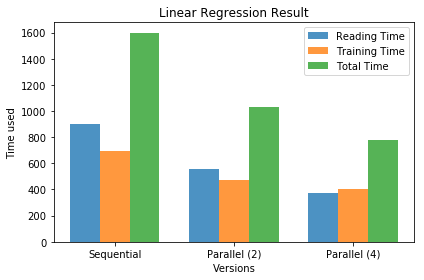

In [19]:
import numpy as np
import matplotlib.pyplot as plt
 
# data to plot
n_groups = 3
readTime = (901.3,559.3,376.1)
trainTime = (696.7,468.9,400.0)
totalTime = (1598.0,1028.4,780.3)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8
 
rects1 = plt.bar(index, readTime, bar_width,
                 alpha=opacity,
                 
                 label='Reading Time')
 
rects2 = plt.bar(index + bar_width, trainTime, bar_width,
                 alpha=opacity,
                 
                 label='Training Time')

rects3 = plt.bar(index + 2*bar_width, totalTime, bar_width,
                 alpha=opacity,
                 
                 label='Total Time')
 
plt.xlabel('Versions')
plt.ylabel('Time used')
plt.title('Linear Regression Result')
plt.xticks(index + bar_width, ('Sequential', 'Parallel (2)', 'Parallel (4)'))
plt.legend()
plt.tight_layout()
plt.show()



<h2>Result</h2>

As you can see, the time for reading, training, and total time has been reduced because we introduced parallel processing to machine learning model. With more data, the time we can save might be even more. 

For the predicted answer, the result error is quite near to each other, which is about 190,000. 

Comparing to the result we can obtain from program called 'RapidMiner'. For ten thousand rows of data, the root mean square error is 736489.

Not only in Linear Regression, parallel processing can also be used in many other machine learning model. It can even be used in deep learning. 

<h2>Conclusion</h2>
<p>In this experiment, we have successfully implement Linear Regression with some parallel processing technique. The result is as shown in the graph above. The time it takes for each version is gradually decrease. If we have larger dataset, the time we saved using parallel might even be larger.</p>

<p>This prove to us that parallel computing can be applied in many field, inclusing machine learning. It can improved computation speed and thus reduced time need to compute something. </p>